In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pickle

In [3]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
labels =['yes', 'no']
values = df['target'].value_counts().values

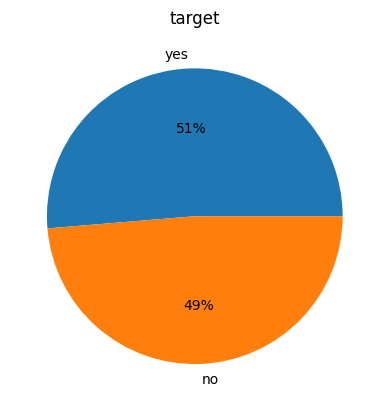

In [5]:
plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title('target')
plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder()

df['age']= le.fit_transform(df['age'])
df['sex']= le.fit_transform(df['sex'])
df['cp']= le.fit_transform(df['cp'])
df['trestbps']= le.fit_transform(df['trestbps'])
df['chol']= le.fit_transform(df['chol'])
df['fbs']= le.fit_transform(df['fbs'])
df['restecg']= le.fit_transform(df['restecg'])
df['thalach']= le.fit_transform(df['thalach'])
df['exang']= le.fit_transform(df['exang'])
df['oldpeak']= le.fit_transform(df['oldpeak'])
df['slope']= le.fit_transform(df['slope'])
df['ca']= le.fit_transform(df['ca'])
df['thal']= le.fit_transform(df['thal'])

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,18,1,0,18,43,0,1,67,0,10,2,2,3,0
1,19,1,0,28,34,1,0,54,1,29,0,0,3,0
2,36,1,0,31,12,0,1,25,1,25,0,0,3,0
3,27,1,0,33,34,0,1,60,0,0,2,1,3,0
4,28,0,0,27,116,1,1,9,0,18,1,3,2,0


In [19]:
x = df.drop(columns=['target'])
y = df['target']

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
from sklearn.naive_bayes import GaussianNB
NB= GaussianNB()
NB.fit(x_train,y_train)

GaussianNB()

In [22]:
y_pred = NB.predict(x_test)
print(y_pred)
print(y_test)

[1 1 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1
 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1
 1 1 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1
 0 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0]
527    1
359    1
447    0
31     1
621    0
      ..
832    1
796    1
644    1
404    0
842    0
Name: target, Length: 205, dtype: int64


In [23]:
from sklearn.metrics import accuracy_score
print('navie bayes is: ', accuracy_score(y_test,y_pred))

navie bayes is:  0.8


In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
cm=confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1= f1_score(y_test, y_pred)

print(cm)
print(recall)
print(precision)
print(f1)

[[72 30]
 [11 92]]
0.8932038834951457
0.7540983606557377
0.8177777777777778


In [29]:
feature_name=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']
test = pd.DataFrame([[1, 2, 1, 3, 4, 5, 3, 6, 4, 2, 5, 6, 5]], columns=feature_name)

testpredict = NB.predict(test) 
if testpredict ==1:
    print("you have heart disease")
else:
    print("you are safe")

you are safe


In [28]:
print(x_train.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')
